# Tutorial

GLHMM is a Python toolbox with a focus on neuroscience applications but broadly applicable to other domains as well. It implements a generalisation of various types of Hidden Markov Model ([HMM](../glossary.md)). The toolbox can be applied on multiple data modalities, including fMRI, EEG, MEG and ECoG, and offers a comprehensive set of HMMs tailored for different data types and analysis goals. The most important configurable aspect is the state distribution, which is parametrised using a regression model. A non-exhaustive list of possible state distributions are: 

-  `Gaussian` : used in fMRI and other neuroimaging modalities.
-  `Wishart` : employed in fMRI to specifically focus on changes in connectivity (covariance).
-  `Time-delay embedded` : applied to whole-brain electrophysiological data (MEG or EEG), to capture spectral modulations in the data.
-  `Autoregressive` : provides a more detailed spectral description for electrophysiological data with a limited number of channels.
-  `Regression-based decoding` : describes the dynamic relationship between brain activity and ongoing stimuli.
-  `Regression-based encoding` : emphasizes the spatial interpretation of brain activity in relation to stimuli.


## Import modules
We first import the relevant modules. If you have not done so, install the repo using:

In [3]:
pip install glhmm


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glhmm.glhmm as glhmm

## Load data
Synthetic data are provided as example in the ´glhmm/docs/notebooks/example1´ folder. The file `data.csv` contains synthetic timeseries. The data should have the shape ((no subjects/sessions * no timepoints), no features), meaning that all subjects and/or sessions have been concatenated along the first dimension. The second dimension is the number of features, e.g., the number of parcels or channels. The file `T.csv` specifies the indices in the concatenated timeseries corresponding to the beginning and end of individual subjects/sessions in the shape (no subjects, 2). In this case, we have generated timeseries for 20 subjects and 50 features. Each subject has 1,000 timepoints. The timeseries has the shape (20000, 50) and the indices have the shape (20, 2).
Data should be in numpy format.

In [5]:
data_tmp = pd.read_csv('example1/data.csv', header=None)
T_t_tmp = pd.read_csv('example1/T.csv', header=None)
data = data_tmp.to_numpy()
T_t = T_t_tmp.to_numpy()

## Initialise and train HMM

This is an example of a ``Gaussian HMM`` on a single set of timeseries from multiple subjects or sessions; the full code is [here](example1/example1.ipynb)

We first initialise the hmm object, configuring the type of HMM that is going to be run. In this case, since we do not model an interaction between two sets of variables in the HMM states, we set `model_beta='no'`. We here estimate 4 states. If you want to model a different number of states, change K to a different value. We here model states as Gaussian distributions with mean and full covariance matrix, so that each state is described by a mean amplitude and functional connectivity pattern, specify `covtype='full'`. If you do not want to model the mean, add `model_mean='no'`. 

In [6]:
hmm = glhmm.glhmm(model_beta='no', K=4, covtype='full')

We then train the HMM using the data and indices loaded above. Since we here do not model an interaction between two sets of timeseries but run a "classic" HMM instead, we set `X=None`. Y should be the timeseries in which we want to estimate states (in here called data) and indices should be the beginning and end indices of each subject (here called T_t). If you need to make indices you can use the `auxiliary.make_indices_from_T` function.

Optionally, you can also return `Gamma` (the state probabilities at each timepoint), `Xi` (the joint probabilities of past and future states conditioned on the data) and `FE` (the free energy of each iteration). 

In [7]:
hmm.train(X=None, Y=data, indices=T_t)

Init repetition 1 free energy = 1380077.4504451659
Init repetition 2 free energy = 1377872.3064660016
Init repetition 3 free energy = 1378803.0680537764
Init repetition 4 free energy = 1379535.3606174032
Init repetition 5 free energy = 1379893.7764895353
Best repetition: 2
Cycle 1 free energy = 1377741.863101995
Cycle 2 free energy = 1377173.379024121
Cycle 3, free energy = 1376845.1330762226, relative change = 0.366047682651871
Cycle 4, free energy = 1376589.0041371305, relative change = 0.22216849319659338
Cycle 5, free energy = 1376343.7990881375, relative change = 0.17538899976147132
Cycle 6, free energy = 1376135.3333575656, relative change = 0.12976151315885762
Cycle 7, free energy = 1375968.4820480214, relative change = 0.09408655244754274
Cycle 8, free energy = 1375834.6821646101, relative change = 0.07015584142463518
Cycle 9, free energy = 1375701.591002333, relative change = 0.0652320650266179
Cycle 10, free energy = 1375574.4090449237, relative change = 0.058678040715242866


(array([[1.06829940e-02, 4.23546316e-05, 1.55358457e-01, 8.33916195e-01],
        [3.11141449e-03, 9.32632180e-06, 1.41659570e-01, 8.55219689e-01],
        [1.53200355e-04, 2.03331524e-06, 2.36315072e-02, 9.76213259e-01],
        ...,
        [1.53819347e-05, 4.86693453e-08, 9.99905498e-01, 7.90709650e-05],
        [1.80782979e-05, 2.53756892e-07, 9.98608085e-01, 1.37358319e-03],
        [2.66086368e-04, 1.42253006e-05, 9.89672331e-01, 1.00473570e-02]]),
 array([[[2.61525507e-03, 3.43020524e-07, 1.04247633e-03, 7.02491954e-03],
         [2.13812832e-07, 2.34174040e-07, 8.01769069e-06, 3.38889540e-05],
         [1.94881211e-04, 5.25365615e-06, 1.36999222e-01, 1.81591000e-02],
         [3.01064395e-04, 3.49547109e-06, 3.60985382e-03, 8.30001781e-01]],
 
        [[6.39475647e-05, 7.93726046e-09, 1.18954944e-05, 3.03556349e-03],
         [3.30658336e-09, 3.42708620e-09, 5.78630531e-08, 9.26172508e-06],
         [7.16981078e-05, 1.82911048e-06, 2.35213456e-02, 1.18064697e-01],
         [1.7

## Inspect model

We then inspect some interesting aspects of the model: the transition probabilities, the state means, and the state covariances.

In [8]:
K = hmm.hyperparameters["K"] # the number of states
q = data.shape[1] # the number of parcels/channels
TP = np.zeros(shape=(K, K))
TP = hmm.P # the transition probability matrix
state_means = np.zeros(shape=(q, K))
state_means = hmm.get_means() # the state means in the shape (no. features, no. states)
state_FC = np.zeros(shape=(q, q, K))
for k in range(K):
    state_FC[:,:,k] = hmm.get_covariance_matrix(k=k) # the state covariance matrices in the shape (no. features, no. features, no. states)

## Plot results 

> For more plotting options, refer to the functions in the module called [Graphics](../../glhmm/graphics.py)

Plot transition probability matrix. Note that self-transitions are usually very likely so there should be a strong diagonal pattern

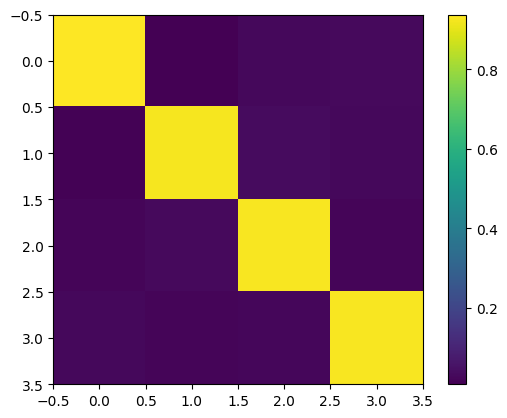

In [9]:
plt.imshow(TP)
plt.colorbar()
plt.show()

Plot state means. This will show the states on the x-axis, each parcel/channel on the y-axis, and the mean activation of each parcel in each state as the color intensity.

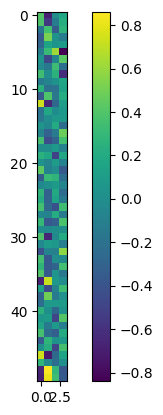

In [10]:
plt.imshow(state_means)
plt.colorbar()
plt.show()

Plot covariance matrix (i.e. FC) of state 1

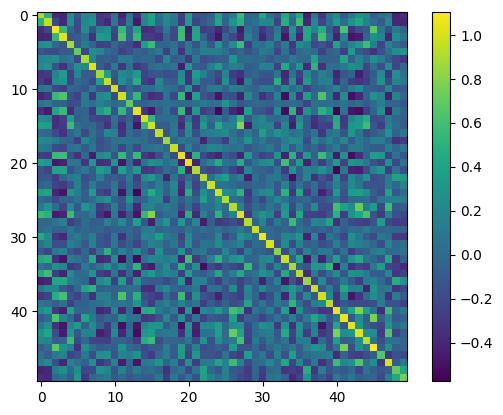

In [11]:
plt.imshow(state_FC[:,:,0])
plt.colorbar()
plt.show()

## Relations to behaviour 

After estimating an HMM, we can explore its connections with an external variable not initially considered in the model. This could involve tasks like predicting age from subject-specific HMMs based on neuroimaging data or examining correlations with physiological factors.<br>
Our toolbox supports these types of analyses in the module called [Prediction](../../glhmm/prediction.py) and [Statistics](../../glhmm/statistics.py)

### Prediction
This module enables the utilization of individual brain activity patterns for various applications, including predictions (such as cognitive abilities) and classifications (of subjects or clinical groups, for example). For a tutorial showcasing this, see [here](./prediction_tutorial.ipynb)

### Statistics
This module provides powerful permutation testing analysis, whcih allows for statistical significance assessment without data distribution assumptions. It supports various test types, such as between- and within-session/subject tests. Users can choose between permutation testing with regression or correlation for a wide range of research questions. For a tutorial demonstrating the application of testing see [here](./statistics_tutorial.ipynb) 